Продольно-поперечная схема для решения уравнения теплопроводности

In [49]:
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D

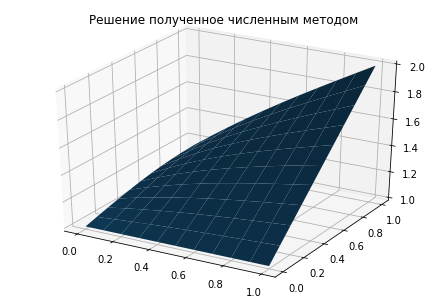

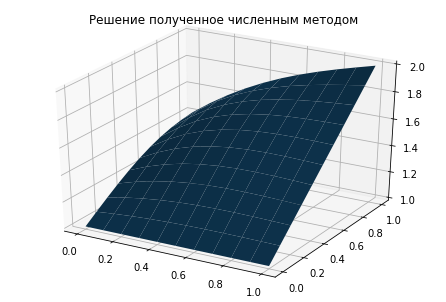

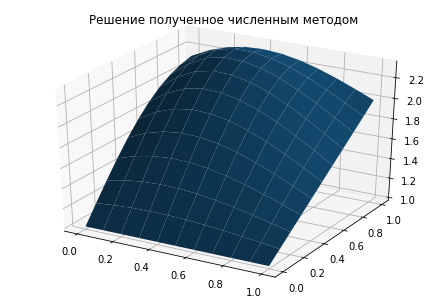

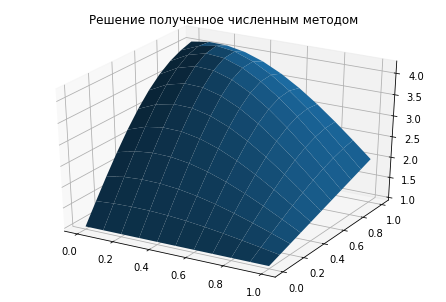

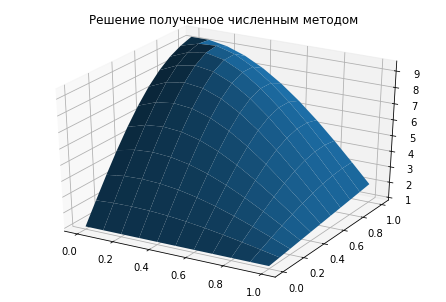

In [51]:
def sch(a, b, c, d):
    
    p=np.zeros_like(b)
    q=np.zeros_like(b)
    r=np.zeros_like(b)
    
    l=len(b)
    p[0]=c[0]/b[0]
    q[0]=d[0]/b[0]
    
    for i in range(1, l):
        m=b[i]-a[i]*p[i-1]
        p[i]=c[i]/m
        q[i]=(d[i]-a[i]*q[i-1])/m
        
    r[-1]=q[-1]
    
    for i in range(l-2, -1, -1):
        r[i]=q[i]-p[i]*r[i+1]
    return r 

for g in range(1, 10, 2):
    
    h=0.1
    tau=0.01
    
    n_r=int(1+1/h)
    n_t=int(1+g/2/tau)
    
    x=y=np.array([x*h for x in range(0, n_r)])
    t=np.array([x*tau for x in range(0, n_t)])
    
    r = np.zeros((n_r, n_r, n_t))
    t_m, y_m = np.meshgrid(t, y)
    r[0,:,:]=1+((np.exp(t_m)-np.exp(-t_m*np.pi**2))/(1+np.pi**2))*np.sin(np.pi*y_m/2)
    r[-1,:,:]=1+y_m
    
    t_m, x_m = np.meshgrid(t, x)
    r[:,0,:]=1
    r[:,-1,:]=1+x_m+((np.exp(t_m)-np.exp(-t_m*np.pi**2))/(1+np.pi**2))*np.cos(np.pi*x_m/2)
    
    y_m, x_m = np.meshgrid(y[1:n_r], x[1:n_r])
    r[1:n_r, 1:n_r, 0]=1+x_m*y_m
    
    for n in range(0, n_t-1):
        
        f_t=r[:,:,n]
        f_t[:,n_r-1]=1+x+((np.exp((n+1/2)*tau)-np.exp(-(n+1/2)*tau*np.pi**2))/(1+np.pi**2))*np.cos(np.pi*x/2)
        
        for j in range(1, n_r-1):
            f_t[0,j]=(1/2)*(r[0,j,n+1]+r[0,j,n])-(tau/(2*h**2))*(r[0,j-1,n+1]-2*r[0,j,n+1]+r[0,j+1,n+1]-r[0,j-1,n]+2*r[0,j,n]-r[0,j+1,n])
            f_t[n_r-1,j]=(1/2)*(r[n_r-1,j,n+1]+r[n_r-1,j,n])-(tau/(2*h**2))*(r[n_r-1,j-1,n+1]-2*r[n_r-1,j,n+1]+r[n_r-1,j+1,n+1]- r[n_r-1,j-1,n]+2*r[n_r-1,j,n]-r[n_r-1,j+1,n])
                                                                          
        for j in range(1,n_r-1):
            for i in range(1,n_r-1): 
                f_t[i,j]=(tau/2)*f(i*h,j*h,tau*(n+1/2))+(tau/h**2)*(r[i,j-1,n]-2*r[i,j,n]+r[i,j+1,n])+r[i,j,n] 
                
        r_t1=np.zeros((n_r,n_r))
        a=np.ones(int(1/h+1))*(-tau/(h**2))
        a[-1]=0 
        
        b=np.ones(int(1/h+1))*(1+2*tau/h**2)
        b[0]=1
        b[-1]=1
        
        c=np.ones(int(1/h+1))*(-tau/(h**2))
        c[0]=0
       
        for j in range(0, n_r):
            r_t1[:,j]=sch(a,b,c,f_t[:,j]) 
            
        f_t=r[:,:,n+1]
        
        for i in range(1,n_r-1):
            for j in range(1,n_r-1):
                f_t[i,j]=(tau/2)*f(i*h,j*h,tau*(n+1))+(tau/h**2)*(r_t1[i-1,j]-2*r_t1[i,j]+r_t1[i+1,j])+r_t1[i,j] 
        r_t2=np.zeros((n_r,n_r))
        
        a=np.ones(int(1/h+1))*(-tau/(h**2))
        a[-1]=0
        
        b=np.ones(int(1/h+1))*(1+2*tau/h**2)
        b[0]=1
        b[-1]=1
        
        c=np.ones(int(1/h+1))*(-tau/(h**2))
        c[0]=0
        for i in range(0, n_r):
            r_t2[i,:]=sch(a,b,c,f_t[i,:]) 
        r[:,:,n+1]=r_t2         
   
    fig = pylab.figure()
    axes = Axes3D(fig)
    x=[x*h for x in range(0, r.shape[0])]
    y=[x*h for x in range(0, r.shape[1])]
    y_m, x_m = np.meshgrid(y, x)
    axes.set_title('Решение полученное численным методом')
    axes.plot_surface(x_m, y_m, r[:,:,int(g/2/tau)])